<a href="https://colab.research.google.com/github/Mohor35/CSE22005_ml/blob/main/CSE22005_lab6(q1_%26_q2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question A1

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Thyroid.xlsx to Thyroid.xlsx


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Summation Unit
def summation_unit(inputs, weights, bias):

    inputs = np.array(inputs, dtype=float)  # Ensuring the inputs are floats
    weights = np.array(weights, dtype=float)  # Ensuring the weights are floats
    weighted_sum = np.dot(inputs, weights) + bias
    return weighted_sum

# Activation Functions
def step_activation(y):
    return 1 if y >= 0 else 0

def sigmoid_activation(y):
    return 1 / (1 + np.exp(-y))

# Comparator Unit for Error Calculation

# Load Thyroid Data
def load_thyroid_data(file_path):

    return pd.read_excel(file_path)

# Mean Squared Error Calculation
def mse_error(y_true, y_pred):

    return np.mean((y_true - y_pred) ** 2)

# Preprocessing function to handle categorical data and missing values
def preprocess_data(data):

    # Separate numeric and non-numeric columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns

    # Handle missing values: Numeric columns -> median, Categorical columns -> mode
    data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

    for col in categorical_columns:
        data[col].fillna(data[col].mode()[0], inplace=True)  # Fill with mode (most frequent)
        data[col] = data[col].astype(str)  # Ensure categorical columns are strings

    # Label encoding for categorical data (convert strings to numeric)
    for column in categorical_columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

    # Separate features (X) and target (y)
    X = data.iloc[:, :-1].values  # Features (all columns except the last one)
    y_true = data.iloc[:, -1].values  # Target (last column)

    return X, y_true

# Load the Thyroid dataset
data = load_thyroid_data('Thyroid.xlsx')

# Preprocess the dataset to handle categorical data
X, y_true = preprocess_data(data)

# Convert target to numeric (if needed)
y_true = y_true.astype(float)

# Initialize random weights and bias for simplicity
weights = np.random.randn(X.shape[1])  # One weight per feature
bias = np.random.randn()

# Predict values using the perceptron with summation and step activation
y_pred = np.array([step_activation(summation_unit(X[i], weights, bias)) for i in range(len(X))])

# Calculate the error
error = mse_error(y_true, y_pred)

print(f'Mean Squared Error: {error}')


Mean Squared Error: 540.4017662450938


Question A2

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Thyroid.xlsx to Thyroid.xlsx


Converged after 3 epochs.


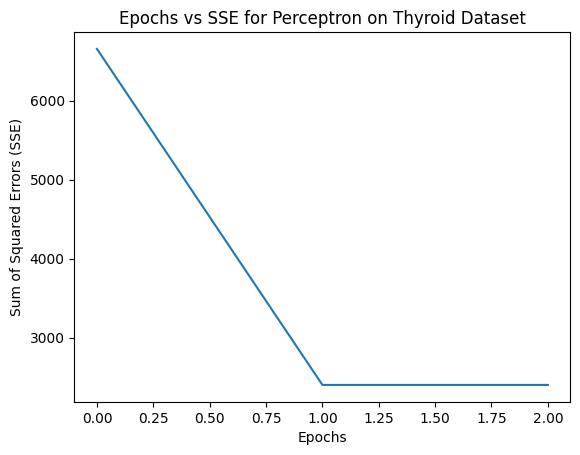

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Thyroid dataset
file_path = 'Thyroid.xlsx'
thyroid_data = pd.read_excel(file_path)

# Data Preprocessing
thyroid_data['sex'] = thyroid_data['sex'].map({'F': 0, 'M': 1})
thyroid_data['TT4'] = pd.to_numeric(thyroid_data['TT4'], errors='coerce')
thyroid_data['TT4'].fillna(thyroid_data['TT4'].mean(), inplace=True)
X = thyroid_data[['age', 'sex', 'TT4']].values
y = thyroid_data['Condition'].apply(lambda x: 0 if x == 'NO CONDITION' else 1).values

# Initialize the perceptron parameters
weights = np.array([10, 0.2, -0.75, 0.1])  # Including the bias weight
learning_rate = 0.05
epochs = 1000
threshold = 0.002

# Step Activation Function
def step_activation(weighted_sum):
    return np.where(weighted_sum >= 0, 1, 0)

# Perceptron Training
def perceptron(X, y, learning_rate=0.05, epochs=1000, threshold=0.002):
    weights = np.array([10, 0.2, -0.75, 0.1])  # Initialize weights and bias
    epoch_errors = []  # To store SSE for each epoch

    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term to input

    for epoch in range(epochs):
        weighted_sum = np.dot(X_bias, weights)
        output = step_activation(weighted_sum)

        error = y - output
        weights += learning_rate * np.dot(X_bias.T, error)

        total_error = np.sum(error ** 2)
        epoch_errors.append(total_error)

        if epoch > 0 and abs(epoch_errors[-1] - epoch_errors[-2]) < threshold:
            print(f"Converged after {epoch + 1} epochs.")
            break

    return epoch_errors, epoch + 1

# Train the perceptron with the selected features and target
errors, epochs_trained = perceptron(X, y)

# Plot the error per epoch
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Epochs vs SSE for Perceptron on Thyroid Dataset')
plt.show()
